In [11]:
from keras.datasets import mnist

import numpy as np

from denoising.methods.neural_network.denoising_autoencoder import DenoisingAutoencoder


from images.visualization import show_images, show

In [12]:
((y_train, _), (y_test, _)) = mnist.load_data()

In [13]:
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

y_train = y_train.astype('float32') / 255.0
y_test = y_test.astype('float32') / 255.0

In [14]:
x_train = np.random.normal(loc=0.5, scale=0.5, size=y_train.shape) + y_train
x_test = np.random.normal(loc=0.5, scale=0.5, size=y_test.shape) + y_test


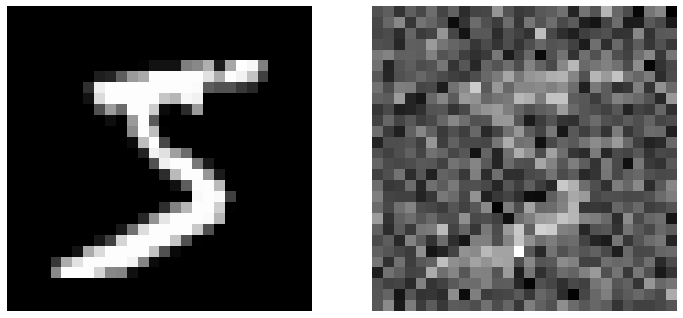

In [18]:
show_images(y_train[0], x_train[0])

In [19]:
denoising_autoencoder = DenoisingAutoencoder(image_dimension=(28,28))

In [20]:
denoising_autoencoder.compile(optimizer='adam', loss='mse', learning_rate=1e-3)

In [21]:
denoising_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                69392     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         109377    
Total params: 178,769
Trainable params: 178,385
Non-trainable params: 384
_________________________________________________________________


In [22]:
denoising_autoencoder.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=32,
    extract_validation_dataset=True
)

Epoch 1/25
1688/1688 [==============================] - 99s 58ms/step - loss: 0.0491 - val_loss: 0.0226
Epoch 2/25
1688/1688 [==============================] - 101s 60ms/step - loss: 0.0196 - val_loss: 0.0192
Epoch 3/25
1688/1688 [==============================] - 109s 64ms/step - loss: 0.0180 - val_loss: 0.0185
Epoch 4/25
1688/1688 [==============================] - 103s 61ms/step - loss: 0.0172 - val_loss: 0.0178
Epoch 5/25
1688/1688 [==============================] - 104s 62ms/step - loss: 0.0166 - val_loss: 0.0174
Epoch 6/25
1688/1688 [==============================] - 107s 64ms/step - loss: 0.0161 - val_loss: 0.0170
Epoch 7/25
1688/1688 [==============================] - 95s 56ms/step - loss: 0.0157 - val_loss: 0.0169
Epoch 8/25
1688/1688 [==============================] - 96s 57ms/step - loss: 0.0153 - val_loss: 0.0167
Epoch 9/25
1688/1688 [==============================] - 97s 57ms/step - loss: 0.0150 - val_loss: 0.0165
Epoch 10/25
1688/1688 [==============================] - 98

In [23]:
pred = denoising_autoencoder.test(x_test)

313/313 - 5s


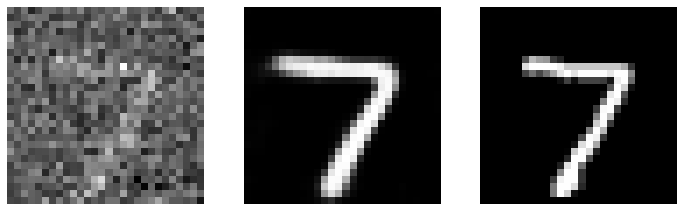

In [24]:
show_images(x_test[0], pred[0], y_test[0])

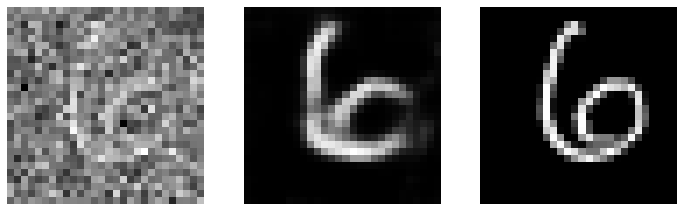

In [25]:
show_images(x_test[100], pred[100], y_test[100])

In [30]:
from denoising.metrics import psnr, ssim
from denoising.utils import normalize

In [35]:
psnr(normalize(y_test, data_type='int'), normalize(x_test, data_type='int')).mean()

7.404938072806173

In [33]:
psnr(normalize(y_test, data_type='int'), normalize(pred, data_type='int')).mean()

18.547570799131027

In [36]:
ssim(normalize(y_test, data_type='int'), normalize(x_test, data_type='int')).mean()

0.16877120151097957

In [37]:
ssim(normalize(y_test, data_type='int'), normalize(pred, data_type='int')).mean()

0.8166245110150151

In [38]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [45]:
peak_signal_noise_ratio(y_test[:,:,:,0], pred[:,:,:,0])

18.016725659113284

In [49]:
peak_signal_noise_ratio(
    normalize(y_test[:,:,:,0], data_type='int'), 
    normalize(pred[:,:,:,0], data_type='int'),
    data_range=255
)

18.030940370310894

In [50]:
peak_signal_noise_ratio(
    normalize(y_test[:,:,:,0], data_type='int'), 
    normalize(x_test[:,:,:,0], data_type='int'),
    data_range=255
)

7.4033146106850545

In [44]:
structural_similarity(y_test[:,:,:,0], x_test[:,:,:,0])

0.23993622164092235

In [53]:
structural_similarity(
    normalize(y_test[:,:,:,0], data_type='int'), 
    normalize(x_test[:,:,:,0], data_type='int'),
    data_range=255
    )

0.18953620306315852

In [46]:
structural_similarity(y_test[:,:,:,0], pred[:,:,:,0])

0.8680306497143553

In [54]:
structural_similarity(
    normalize(y_test[:,:,:,0], data_type='int'), 
    normalize(pred[:,:,:,0], data_type='int'),
    data_range=255
    )

0.8568314831253703